### **1.Multiple Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
file_csv = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
df = pd.read_csv("BostonHousing.csv")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
print(df.isna().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
x = df.drop(columns=['medv'])
y = df['medv']
print(f"Independent Variables (X):{x.columns}")
print(y)

Independent Variables (X):Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# Display the shapes of the resulting datasets
print(x_train)
print(y_train)

         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     ptratio       b  lstat  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     1

In [ ]:
# Standardizing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
print(x_train)


[[ 1.28770177 -0.50032012  1.03323679 ...  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 ...  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 ... -0.63717631  0.06529747
  -0.65159505]
 ...
 [-0.40547014  2.95931752 -1.30336132 ... -0.59225149  0.37901005
  -0.91069248]
 [ 0.85189733 -0.50032012  1.03323679 ...  0.84534281 -2.69458597
   1.52257036]
 [-0.38135592 -0.50032012 -0.35216694 ...  1.15981657 -3.12158061
  -0.25731635]]


In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=8)


In [ ]:
np.mean(mse)

-23.388320863456777

In [ ]:
# predict
reg_pred = regression.predict(x_test)
print(reg_pred)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

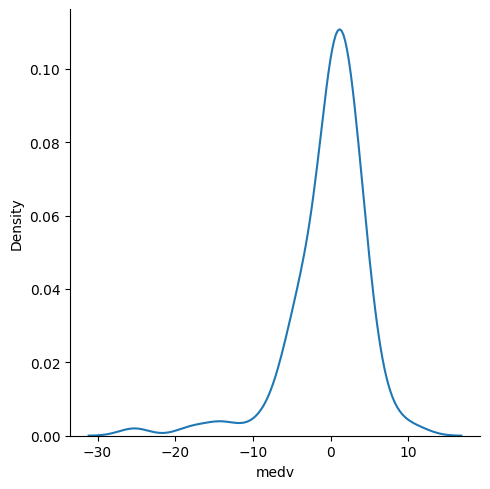

In [ ]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind ='kde')

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
print(score)

0.6333247469014345


### **2. Descision Tree with Hyper Parameter Tuning**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# independent and depemdent feature
x = df.iloc[:,: -1]
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(x_train, y_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                 5.5               2.4                3.7               1.0
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
75                 6.6               3.0                4.4               1.4
109                7.2               3.6                6.1               2.5
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[105 rows x 4 columns] 81     1
133    2
137    2
75     1
109 

In [ ]:
#prepunning
parameter = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treemodel = DecisionTreeClassifier()

In [ ]:
cv =GridSearchCV(treemodel,param_grid =parameter, cv =5,scoring ='accuracy')
cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
y_pred = cv.predict(x_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
score = accuracy_score(y_pred,y_test)
score

0.9833333333333333

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.97        20
           2       0.94      1.00      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### **3.Navie Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predict and evaluate
nb_predictions = nb.predict(x_test)
nb_accuracy = (nb_predictions == y_test).mean()
print(f"Accuracy: {nb_accuracy}")

Accuracy: 0.9777777777777777


In [ ]:
from sklearn.metrics import  f1_score
print(f1_score(y_test, y_pred, average='weighted'))

0.9777448559670783


### **4. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC


In [ ]:
 #Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
#Instantiate and train the SVM
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
#Predict using the model
y_pred = svm_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### **6. Handle Missing Value in Machine Learning**

In [ ]:
df.iloc[0:2, 1] = np.nan
df.iloc[0:9, 3] = np.nan
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,NaN,1.4,NaN,0
1,4.9,NaN,1.4,NaN,0
2,4.7,3.2,1.3,NaN,0
3,4.6,3.1,1.5,NaN,0
4,5.0,3.6,1.4,NaN,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     2
petal length (cm)    0
petal width (cm)     9
target               0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="mean")
df = imputer.fit_transform(df)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### **7. Plot any three visualization**

In [ ]:
import seaborn as sns
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

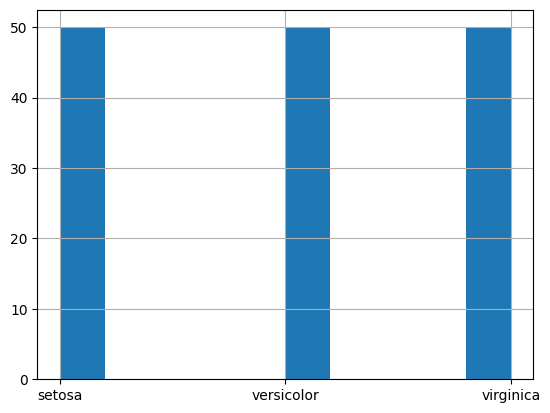

In [ ]:
df['species'].hist()

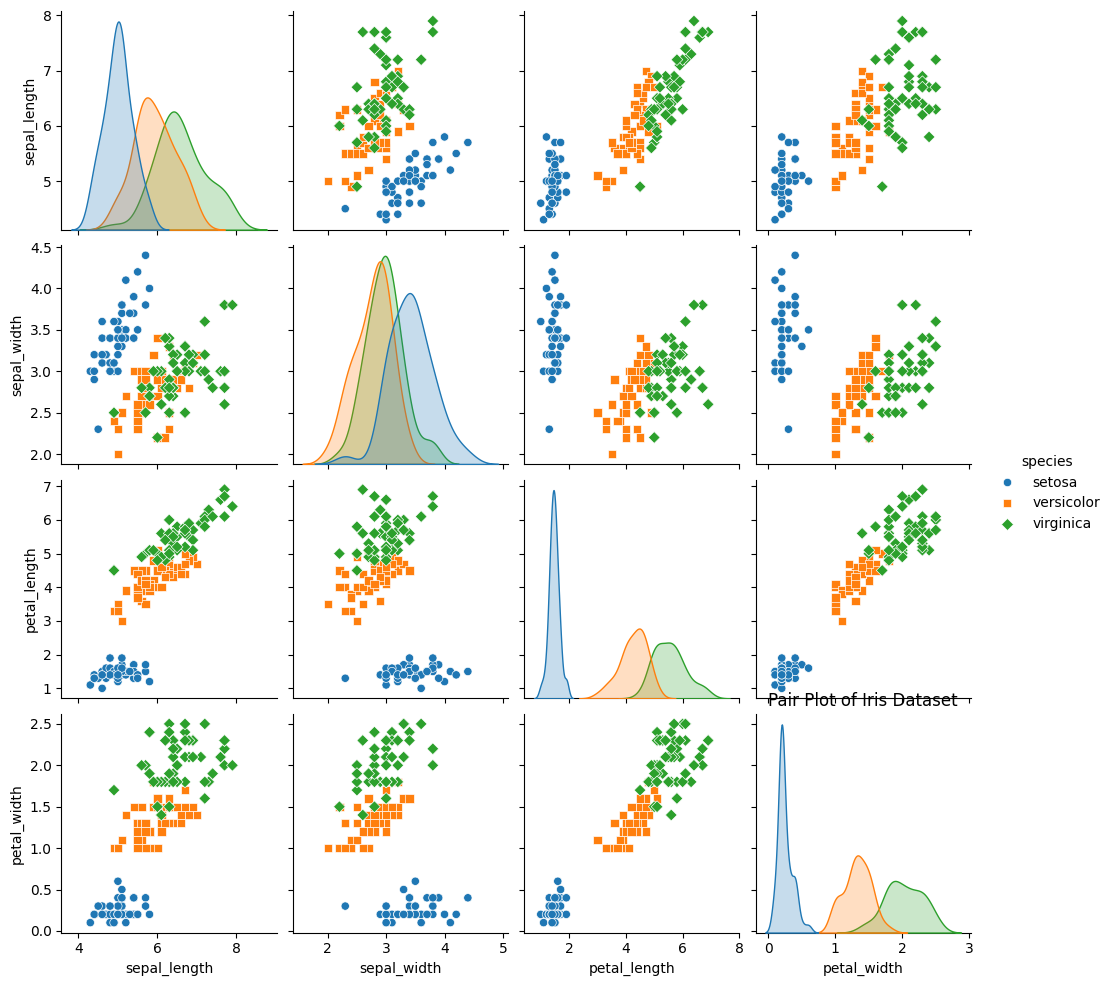

In [ ]:
# Create a pairplot to visualize the relationships between each pair of features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.title('Pair Plot of Iris Dataset')
plt.show()

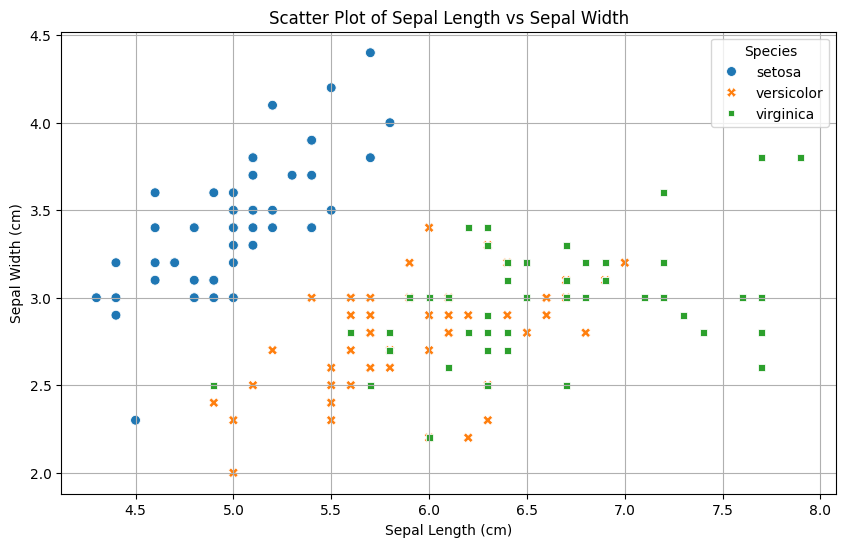

In [ ]:
# Create a scatter plot for two features: 'sepal_length' and 'sepal_width'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=50)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

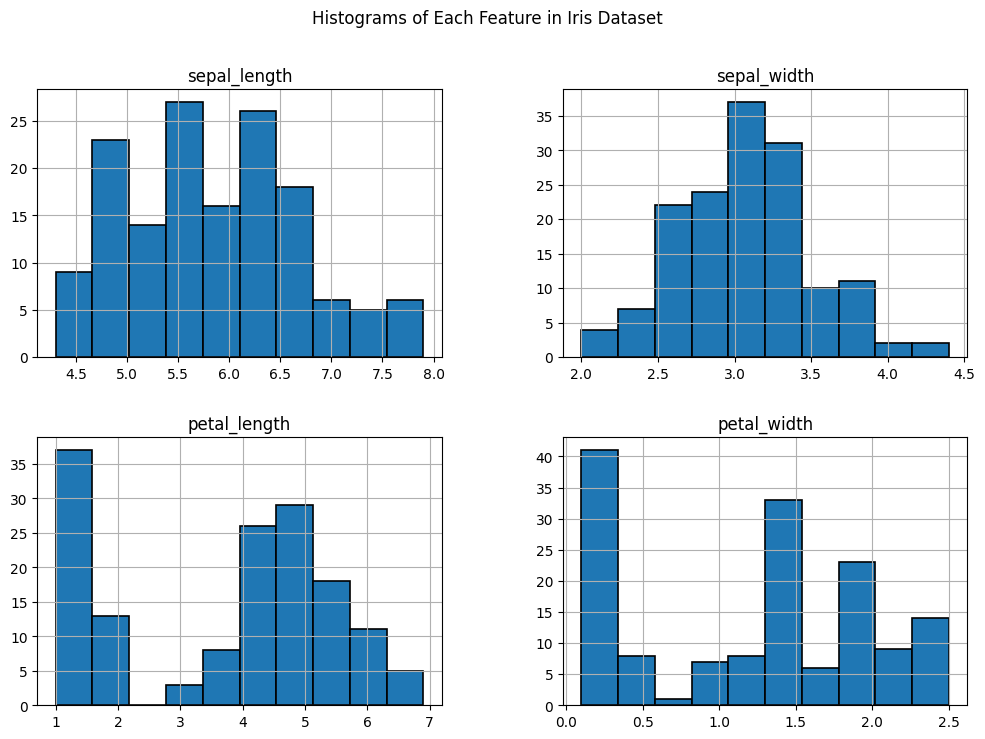

In [ ]:
# Create histograms for each feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.suptitle('Histograms of Each Feature in Iris Dataset')
plt.show()